In [2]:
import io
import pandas as pd


In [25]:
df = pd.read_table("lista01.dat", sep="\s+", usecols=['ocupacion', 'educacion','ingreso','mujeres','prestigio','censo','tipo'])
df.head()

,ocupacion,educacion,ingreso,mujeres,prestigio,censo,tipo
0,GOV.ADMINISTRATORS,13.11,12351,11.16,68.8,1113,prof
1,GENERAL.MANAGERS,12.26,25879,4.02,69.1,1130,prof
2,ACCOUNTANTS,12.77,9271,15.70,63.4,1171,prof
3,PURCHASING.OFFICERS,11.42,8865,9.11,56.8,1175,prof
4,CHEMISTS,14.62,8403,11.68,73.5,2111,prof


# Control 1
## Descripción y Análisis Exploratorio de Datos
Jorge Rotter  
Emiliano Zambrano 157043  
Jerónimo Aranda 150344  

### Análisis Exploratorio


In [29]:
tipo_to_numeric={'prof':2,'bc':0,'wc':1}
df['tipo_numeric']=df['tipo'].map(tipo_to_numeric)
df.head()

,ocupacion,educacion,ingreso,mujeres,prestigio,censo,tipo,tipo_numeric
0,GOV.ADMINISTRATORS,13.11,12351,11.16,68.8,1113,prof,2.0
1,GENERAL.MANAGERS,12.26,25879,4.02,69.1,1130,prof,2.0
2,ACCOUNTANTS,12.77,9271,15.70,63.4,1171,prof,2.0
3,PURCHASING.OFFICERS,11.42,8865,9.11,56.8,1175,prof,2.0
4,CHEMISTS,14.62,8403,11.68,73.5,2111,prof,2.0


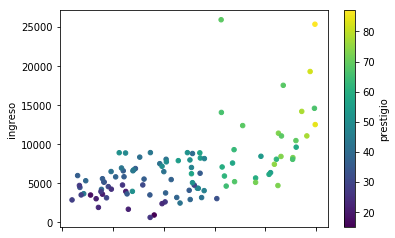

In [10]:
df.plot.scatter(x='educacion',y='ingreso',c='prestigio',colormap='viridis')

Para empezar, el ingreso es creciente con respecto a la educación. Asimismo, mientras el nivel de educación crece, las ocupaciones se consideran más prestigiosas. Luego, el prestigio crece mientras el nivel de ingreso es mayor. También, los datos muestran que las ocupaciones con alto nivel de ingreso, educación y prestigio son escasas. 

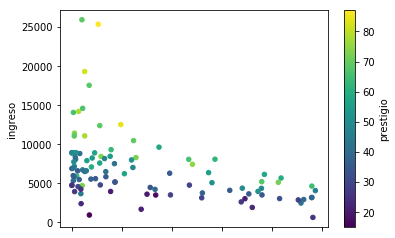

In [11]:
df.plot.scatter(x='mujeres',y='ingreso',c='prestigio',colormap='viridis')

El ingreso tiene una ligera tendencia decreciente a medida que el porcentaje de mujeres en la ocupación crece. Los datos no muestran una relación marcada entre el porcentaje de mujeres y el prestigio. Sin embargo, se observa que la cantidad de ocupaciones con alto nivel de prestigio es decreciente con respecto a la mujeres en la ocupación; es decir, a mayor porcentaje de mujeres se observa una caída en la cantidad de ocupaciones con prestigio mayor a 50. También, vale la pena destacar la acumulación de ocupaciones con un bajo porcentaje de mujeres, en particular aquellas con ingreso mayor a 5000 y prestigio mayor a 60.

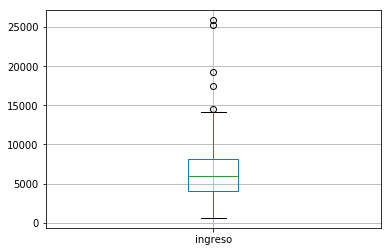

In [15]:
df.boxplot(column=['ingreso'])

La mitad de las ocupaciones generan un ingreso de 6000 o menos, mientras que 5 ocupaciones generan 15000 o más. Las dos ocupaciones con mayor ingreso generan por lo menos 4.5 veces más que la mitad de todas las ocupaciones. Asimismo, el 75% de los trabajos generan a los más una tercera parte de lo que ingresan los dos mejor remunerados.

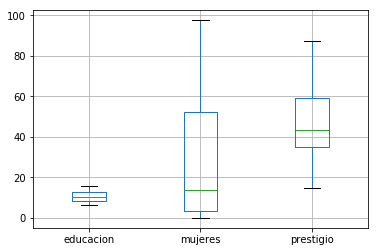

In [16]:
df.boxplot(column=['educacion','mujeres','prestigio'])

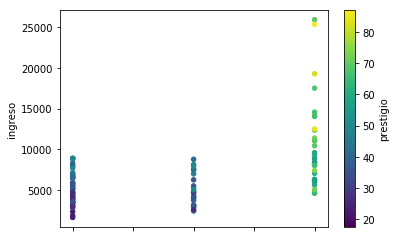

In [30]:
df.plot.scatter(x='tipo_numeric',y='ingreso',c='prestigio',colormap='viridis')

### Clasificación de variables

In [7]:
print(df.columns)

Index(['ocupacion', 'educacion', 'ingreso', 'mujeres', 'prestigio', 'censo',
       'tipo'],
      dtype='object')


In [8]:
print(df.dtypes)

ocupacion     object
educacion    float64
ingreso        int64
mujeres      float64
prestigio    float64
censo          int64
tipo          object
dtype: object


### Conclusiones